In [73]:
from pyspark.sql.functions import *
from pyspark.sql.types import *
from pyspark.sql import SparkSession
from pyspark.sql.window import Window
import matplotlib.pyplot as plt

In [9]:
spark = (
    SparkSession.builder\
    .appName('Spark')\
    .getOrCreate()
)

In [10]:
df = spark.read.csv('carros.csv', header=True, inferSchema=True)
df.count()

258

In [8]:
df.printSchema()

root
 |-- Nome: string (nullable = true)
 |-- Motor: string (nullable = true)
 |-- Ano: integer (nullable = true)
 |-- Quilometragem: integer (nullable = true)
 |-- Zero_km: boolean (nullable = true)
 |-- Acessorios: string (nullable = true)
 |-- valor: double (nullable = true)



In [9]:
df = df.withColumn('valor', col('valor').cast(FloatType()))

In [10]:
df.show(truncate=False)

+----------------+---------------------+----+-------------+-------+--------------------------------------------------+---------+
|Nome            |Motor                |Ano |Quilometragem|Zero_km|Acessorios                                        |valor    |
+----------------+---------------------+----+-------------+-------+--------------------------------------------------+---------+
|Jetta Variant   |Motor 4.0 Turbo      |2003|44410        |false  |Rodas de liga, Sensor de chuva                    |88078.64 |
|Passat          |Motor Diesel         |1991|5712         |false  |Central multimídia, Câmera de estacionamento      |106161.94|
|Crossfox        |Motor Diesel V8      |1990|37123        |false  |Piloto automático, Vidros elétricos               |72832.16 |
|DS5             |Motor 2.4 Turbo      |2019|null         |true   |Travas elétricas, Rodas de liga                   |124549.07|
|Aston Martin DB4|Motor 2.4 Turbo      |2006|25757        |false  |Rodas de liga, Piloto automáti

In [11]:
df.filter(col('Zero_km')=="true").where(col('Motor')=='Motor Diesel').orderBy('valor').show()

+-------------------+------------+----+-------------+-------+--------------------+---------+
|               Nome|       Motor| Ano|Quilometragem|Zero_km|          Acessorios|    valor|
+-------------------+------------+----+-------------+-------+--------------------+---------+
|       Série 7 Sedã|Motor Diesel|2019|         null|   true|Vidros elétricos,...| 67539.79|
|            Sorento|Motor Diesel|2019|         null|   true|Sensor de chuva, ...| 81399.35|
|Aston Martin Virage|Motor Diesel|2019|         null|   true|Travas elétricas,...| 97290.18|
|              Camry|Motor Diesel|2019|         null|   true|Travas elétricas,...|138597.27|
|        Cielo Hatch|Motor Diesel|2019|         null|   true|Painel digital, A...| 145197.7|
+-------------------+------------+----+-------------+-------+--------------------+---------+



In [12]:
df.groupBy('Motor').agg(count('*').alias('qtde_motor')).orderBy('qtde_motor', ascending=False).show(300)

+--------------------+----------+
|               Motor|qtde_motor|
+--------------------+----------+
|       Motor 3.0 32v|        27|
|        Motor Diesel|        26|
|        Motor 1.0 8v|        25|
|            Motor V8|        25|
|     Motor 4.0 Turbo|        25|
|     Motor Diesel V6|        21|
|     Motor Diesel V8|        21|
|Motor 5.0 V8 Bi-T...|        21|
|            Motor V6|        20|
|       Motor 2.0 16v|        18|
|       Motor 1.8 16v|        18|
|     Motor 2.4 Turbo|        10|
|                null|         1|
+--------------------+----------+



In [13]:
df.filter('Motor = "Motor 3.0 32v"').orderBy('valor', ascending=False).show()

+--------------------+-------------+----+-------------+-------+--------------------+---------+
|                Nome|        Motor| Ano|Quilometragem|Zero_km|          Acessorios|    valor|
+--------------------+-------------+----+-------------+-------+--------------------+---------+
|Lamborghini Ferru...|Motor 3.0 32v|2019|         null|   true|Vidros elétricos,...|149157.17|
|               Versa|Motor 3.0 32v|2009|        85554|  false|Bancos de couro, ...|148152.89|
|               Fusca|Motor 3.0 32v|2013|        24638|  false|Câmbio automático...|130238.04|
|            Santa Fe|Motor 3.0 32v|2019|         null|   true|Travas elétricas,...|129415.33|
|        Dodge Jorney|Motor 3.0 32v|2010|        99197|  false|Vidros elétricos,...|120716.27|
|              Cayman|Motor 3.0 32v|2013|         2627|  false|Central multimídi...|117961.95|
|              207 SW|Motor 3.0 32v|2017|       119760|  false|Controle de estab...|117709.67|
|          Grand Tour|Motor 3.0 32v|1999|        4

In [14]:
df.filter(col('Motor')=="Motor Diesel").where(col('Zero_km')=="false").orderBy('valor', ascending=False).show(truncate=False)

+---------------------+------------+----+-------------+-------+--------------------------------------------+---------+
|Nome                 |Motor       |Ano |Quilometragem|Zero_km|Acessorios                                  |valor    |
+---------------------+------------+----+-------------+-------+--------------------------------------------+---------+
|Kangoo Express       |Motor Diesel|2007|29132        |false  |Bancos de couro, Painel digital             |146716.9 |
|Gallardo LP 560 – 4  |Motor Diesel|2000|113045       |false  |Freios ABS, 4 X 4                           |144118.9 |
|Silver Shadow        |Motor Diesel|2015|99052        |false  |4 X 4, Sensor de chuva                      |143568.22|
|Dodge Dakota         |Motor Diesel|1993|71544        |false  |Controle de tração, Vidros elétricos        |141083.34|
|A4 Avant             |Motor Diesel|2014|17357        |false  |Teto panorâmico, Controle de tração         |138946.88|
|Symbol               |Motor Diesel|2016|117714 

In [15]:
df.select(['nome','acessorios']).show(truncate=False)

+----------------+--------------------------------------------------+
|nome            |acessorios                                        |
+----------------+--------------------------------------------------+
|Jetta Variant   |Rodas de liga, Sensor de chuva                    |
|Passat          |Central multimídia, Câmera de estacionamento      |
|Crossfox        |Piloto automático, Vidros elétricos               |
|DS5             |Travas elétricas, Rodas de liga                   |
|Aston Martin DB4|Rodas de liga, Piloto automático                  |
|Palio Weekend   |Sensor de estacionamento, Bancos de couro         |
|A5              |Câmbio automático, Rodas de liga                  |
|Série 3 Cabrio  |Controle de estabilidade, Câmera de estacionamento|
|Dodge Jorney    |Vidros elétricos, Travas elétricas                |
|Carens          |Ar condicionado, Câmera de estacionamento         |
|Ford Edge       |Sensor crepuscular, Ar condicionado               |
|Courier         |Ce

In [16]:
df.withColumn("age", when(col("Ano")<2000,"old").when(col("Ano")>2010,"new").otherwise("medium")).show()
#df.show()

+----------------+--------------------+----+-------------+-------+--------------------+---------+------+
|            Nome|               Motor| Ano|Quilometragem|Zero_km|          Acessorios|    valor|   age|
+----------------+--------------------+----+-------------+-------+--------------------+---------+------+
|   Jetta Variant|     Motor 4.0 Turbo|2003|        44410|  false|Rodas de liga, Se...| 88078.64|medium|
|          Passat|        Motor Diesel|1991|         5712|  false|Central multimídi...|106161.94|   old|
|        Crossfox|     Motor Diesel V8|1990|        37123|  false|Piloto automático...| 72832.16|   old|
|             DS5|     Motor 2.4 Turbo|2019|         null|   true|Travas elétricas,...|124549.07|   new|
|Aston Martin DB4|     Motor 2.4 Turbo|2006|        25757|  false|Rodas de liga, Pi...|  92612.1|medium|
|   Palio Weekend|       Motor 1.8 16v|2012|        10728|  false|Sensor de estacio...| 97497.73|   new|
|              A5|     Motor 4.0 Turbo|2019|         nu

In [17]:
df = df.withColumn('Status', 
              when(col("valor")<5000,"barato")
              .when((col("valor")>5000) & (col("valor") <20000),"intermediario")
              .when((col("valor")>20000) & (col("valor") < 70000),"caro")
              .otherwise("carro de rico"))

In [18]:
df.filter(col('Status')=="caro").orderBy("valor").show()

+--------------------+--------------------+----+-------------+-------+--------------------+--------+------+
|                Nome|               Motor| Ano|Quilometragem|Zero_km|          Acessorios|   valor|Status|
+--------------------+--------------------+----+-------------+-------+--------------------+--------+------+
|              Livina|       Motor 2.0 16v|2019|         null|   true|Sensor crepuscula...| 50742.1|  caro|
|          Pajero TR4|     Motor 2.4 Turbo|2019|         null|   true|Controle de traçã...|51606.59|  caro|
|Cadillac Ciel con...|            Motor V8|1991|        29981|  false|Bancos de couro, ...|51667.06|  caro|
|        Phantom 2013|            Motor V8|2014|        27505|  false|Controle de estab...|51759.58|  caro|
|  Cadillac XTS sedan|     Motor Diesel V6|1993|        90924|  false|Ar condicionado, ...|52207.45|  caro|
|                 C30|        Motor 1.0 8v|2001|        55738|  false|Teto panorâmico, ...|52805.91|  caro|
|                  J5|      

In [19]:
df.select(max("valor")).show()

+----------+
|max(valor)|
+----------+
| 149489.92|
+----------+



In [20]:
df.select(min("valor")).show()

+----------+
|min(valor)|
+----------+
|   50742.1|
+----------+



In [21]:
from certifi import where


df.filter((col('valor') > 149489.91) | (col('valor') <  50742.2)).show()

+------+---------------+----+-------------+-------+--------------------+---------+-------------+
|  Nome|          Motor| Ano|Quilometragem|Zero_km|          Acessorios|    valor|       Status|
+------+---------------+----+-------------+-------+--------------------+---------+-------------+
|Livina|  Motor 2.0 16v|2019|         null|   true|Sensor crepuscula...|  50742.1|         caro|
|   ASX|Motor Diesel V8|2003|        61672|  false|Ar condicionado, ...|149489.92|carro de rico|
+------+---------------+----+-------------+-------+--------------------+---------+-------------+



In [22]:
df.filter((col('Motor') == "Motor Diesel V8") & (col('Zero_km') == "true")).show()

+---------------+---------------+----+-------------+-------+--------------------+---------+-------------+
|           Nome|          Motor| Ano|Quilometragem|Zero_km|          Acessorios|    valor|       Status|
+---------------+---------------+----+-------------+-------+--------------------+---------+-------------+
|           CR-V|Motor Diesel V8|2019|         null|   true|Câmbio automático...|  64701.1|         caro|
|    Grand Siena|Motor Diesel V8|2019|         null|   true|Bancos de couro, ...|115075.59|carro de rico|
|    L200 Triton|Motor Diesel V8|2019|         null|   true|Vidros elétricos,...| 81999.21|carro de rico|
|Vantage Volante|Motor Diesel V8|2019|         null|   true|Freios ABS, Câmbi...|114434.94|carro de rico|
|       Classe B|Motor Diesel V8|2019|         null|   true|   4 X 4, Freios ABS| 135543.0|carro de rico|
|         Parati|Motor Diesel V8|2019|         null|   true|Sensor de estacio...|121708.73|carro de rico|
+---------------+---------------+----+--------

In [23]:
df = df.drop(col('Status'))
df.filter(df["Acessorios"].like("%Sensor de estacionamento%")).orderBy("valor").show(50,truncate=False)

+------------------------+---------------------+----+-------------+-------+--------------------------------------------------+---------+
|Nome                    |Motor                |Ano |Quilometragem|Zero_km|Acessorios                                        |valor    |
+------------------------+---------------------+----+-------------+-------+--------------------------------------------------+---------+
|Livina                  |Motor 2.0 16v        |2019|null         |true   |Sensor crepuscular, Sensor de estacionamento      |50742.1  |
|Equus                   |Motor 3.0 32v        |2004|57683        |false  |Travas elétricas, Sensor de estacionamento        |53620.31 |
|XKR                     |Motor Diesel         |1996|85127        |false  |Controle de tração, Sensor de estacionamento      |54263.16 |
|Série 3 Sedã            |Motor 3.0 32v        |1993|28834        |false  |Controle de tração, Sensor de estacionamento      |55924.63 |
|New Fiesta Hatch        |Motor Diesel   

In [24]:
df.filter((col('Motor')=="Motor Diesel V6") | (col("Ano")>2015)\
           & (df["Acessorios"].like("%Sensor de estacionamento%")))\
            .orderBy('Motor', ascending=False).show(50,truncate=False)

+-------------------+---------------+----+-------------+-------+--------------------------------------------------+---------+
|Nome               |Motor          |Ano |Quilometragem|Zero_km|Acessorios                                        |valor    |
+-------------------+---------------+----+-------------+-------+--------------------------------------------------+---------+
|Accord             |Motor V8       |2019|null         |true   |Sensor de estacionamento, Câmera de estacionamento|131961.44|
|Benni Mini         |Motor V8       |2019|null         |true   |Sensor crepuscular, Sensor de estacionamento      |126247.84|
|Parati             |Motor Diesel V8|2019|null         |true   |Sensor de estacionamento, Controle de estabilidade|121708.73|
|Ford Edge          |Motor Diesel V6|2002|12859        |false  |Sensor crepuscular, Ar condicionado               |71647.59 |
|Lamborghini Obvious|Motor Diesel V6|1994|98079        |false  |Rodas de liga, Sensor crepuscular                 |133

In [25]:
df.withColumn("valor_atual", df["valor"]+ 2000).show()

+----------------+--------------------+----+-------------+-------+--------------------+---------+-----------+
|            Nome|               Motor| Ano|Quilometragem|Zero_km|          Acessorios|    valor|valor_atual|
+----------------+--------------------+----+-------------+-------+--------------------+---------+-----------+
|   Jetta Variant|     Motor 4.0 Turbo|2003|        44410|  false|Rodas de liga, Se...| 88078.64|   90078.64|
|          Passat|        Motor Diesel|1991|         5712|  false|Central multimídi...|106161.94|  108161.94|
|        Crossfox|     Motor Diesel V8|1990|        37123|  false|Piloto automático...| 72832.16|   74832.16|
|             DS5|     Motor 2.4 Turbo|2019|         null|   true|Travas elétricas,...|124549.07|  126549.07|
|Aston Martin DB4|     Motor 2.4 Turbo|2006|        25757|  false|Rodas de liga, Pi...|  92612.1|    94612.1|
|   Palio Weekend|       Motor 1.8 16v|2012|        10728|  false|Sensor de estacio...| 97497.73|   99497.73|
|         

In [26]:
df.filter(~(col("Motor")=="Motor 3.0 32v")).show()

+-------------------+--------------------+----+-------------+-------+--------------------+---------+
|               Nome|               Motor| Ano|Quilometragem|Zero_km|          Acessorios|    valor|
+-------------------+--------------------+----+-------------+-------+--------------------+---------+
|      Jetta Variant|     Motor 4.0 Turbo|2003|        44410|  false|Rodas de liga, Se...| 88078.64|
|             Passat|        Motor Diesel|1991|         5712|  false|Central multimídi...|106161.94|
|           Crossfox|     Motor Diesel V8|1990|        37123|  false|Piloto automático...| 72832.16|
|                DS5|     Motor 2.4 Turbo|2019|         null|   true|Travas elétricas,...|124549.07|
|   Aston Martin DB4|     Motor 2.4 Turbo|2006|        25757|  false|Rodas de liga, Pi...|  92612.1|
|      Palio Weekend|       Motor 1.8 16v|2012|        10728|  false|Sensor de estacio...| 97497.73|
|                 A5|     Motor 4.0 Turbo|2019|         null|   true|Câmbio automático...| 

In [27]:
media2 = df.select(avg('valor').alias('valor_medio'))

In [28]:
media2.withColumn("valor_medio", col("valor_medio").cast(FloatType()))
media2.withColumn("valor_medio", format_number(round(col('valor_medio')), 1)).show()

+-----------+
|valor_medio|
+-----------+
|   98,961.0|
+-----------+



In [29]:
df.withColumn("valor", lpad(col("valor"), 11, "0")).show() #Só para teste mesmo!

+----------------+--------------------+----+-------------+-------+--------------------+-----------+
|            Nome|               Motor| Ano|Quilometragem|Zero_km|          Acessorios|      valor|
+----------------+--------------------+----+-------------+-------+--------------------+-----------+
|   Jetta Variant|     Motor 4.0 Turbo|2003|        44410|  false|Rodas de liga, Se...|00088078.64|
|          Passat|        Motor Diesel|1991|         5712|  false|Central multimídi...|00106161.94|
|        Crossfox|     Motor Diesel V8|1990|        37123|  false|Piloto automático...|00072832.16|
|             DS5|     Motor 2.4 Turbo|2019|         null|   true|Travas elétricas,...|00124549.07|
|Aston Martin DB4|     Motor 2.4 Turbo|2006|        25757|  false|Rodas de liga, Pi...|000092612.1|
|   Palio Weekend|       Motor 1.8 16v|2012|        10728|  false|Sensor de estacio...|00097497.73|
|              A5|     Motor 4.0 Turbo|2019|         null|   true|Câmbio automático...|000056445.2|


In [30]:
df.show()


+----------------+--------------------+----+-------------+-------+--------------------+---------+
|            Nome|               Motor| Ano|Quilometragem|Zero_km|          Acessorios|    valor|
+----------------+--------------------+----+-------------+-------+--------------------+---------+
|   Jetta Variant|     Motor 4.0 Turbo|2003|        44410|  false|Rodas de liga, Se...| 88078.64|
|          Passat|        Motor Diesel|1991|         5712|  false|Central multimídi...|106161.94|
|        Crossfox|     Motor Diesel V8|1990|        37123|  false|Piloto automático...| 72832.16|
|             DS5|     Motor 2.4 Turbo|2019|         null|   true|Travas elétricas,...|124549.07|
|Aston Martin DB4|     Motor 2.4 Turbo|2006|        25757|  false|Rodas de liga, Pi...|  92612.1|
|   Palio Weekend|       Motor 1.8 16v|2012|        10728|  false|Sensor de estacio...| 97497.73|
|              A5|     Motor 4.0 Turbo|2019|         null|   true|Câmbio automático...|  56445.2|
|  Série 3 Cabrio|  

In [31]:
df = df.na.drop(how="any",thresh=6)

In [32]:
df.toPandas().isna().sum()

Nome              0
Motor             0
Ano               0
Quilometragem    61
Zero_km           0
Acessorios        0
valor             0
dtype: int64

In [64]:
da = df.withColumn("less_80", when(col("valor")< 80000, 1).otherwise(0))\
            .groupBy("Zero_km").agg((100*(sum("less_80")/count("*"))).alias("abaixo_de_80k"))

In [64]:
ds = df.groupBy("Zero_km").agg(count("*").alias("qtd_0km"))

In [65]:
ds.show()

+-------+-------+
|Zero_km|qtd_0km|
+-------+-------+
|   null|      1|
|   true|     61|
|  false|    196|
+-------+-------+



In [66]:
ds.join(da,on="Zero_km", how="right").show()

+-------+-------+------------------+
|Zero_km|qtd_0km|     abaixo_de_80k|
+-------+-------+------------------+
|   true|     61| 27.86885245901639|
|  false|    196|35.204081632653065|
+-------+-------+------------------+



In [63]:
ds.join(da, "Zero_km").show()

+-------+-------+------------------+
|Zero_km|qtd_0km|     abaixo_de_80k|
+-------+-------+------------------+
|   true|     61| 27.86885245901639|
|  false|    196|35.204081632653065|
+-------+-------+------------------+



In [67]:
ds = ds.join(da, "Zero_km",how="right")
ds.show()

+-------+-------+------------------+
|Zero_km|qtd_0km|     abaixo_de_80k|
+-------+-------+------------------+
|   true|     61| 27.86885245901639|
|  false|    196|35.204081632653065|
+-------+-------+------------------+



In [36]:
ds = ds.withColumn("abaixo_de_80k", format_number(round(col("abaixo_de_80k"),2),2))
ds.show()

+-------+-------+-------------+
|Zero_km|qtd_0km|abaixo_de_80k|
+-------+-------+-------------+
|   true|     61|        27.87|
|  false|    196|        35.20|
+-------+-------+-------------+



In [37]:
nulos = df.withColumn("default", lit(""))

In [38]:
nulos.show()

+----------------+--------------------+----+-------------+-------+--------------------+---------+-------+
|            Nome|               Motor| Ano|Quilometragem|Zero_km|          Acessorios|    valor|default|
+----------------+--------------------+----+-------------+-------+--------------------+---------+-------+
|   Jetta Variant|     Motor 4.0 Turbo|2003|        44410|  false|Rodas de liga, Se...| 88078.64|       |
|          Passat|        Motor Diesel|1991|         5712|  false|Central multimídi...|106161.94|       |
|        Crossfox|     Motor Diesel V8|1990|        37123|  false|Piloto automático...| 72832.16|       |
|             DS5|     Motor 2.4 Turbo|2019|         null|   true|Travas elétricas,...|124549.07|       |
|Aston Martin DB4|     Motor 2.4 Turbo|2006|        25757|  false|Rodas de liga, Pi...|  92612.1|       |
|   Palio Weekend|       Motor 1.8 16v|2012|        10728|  false|Sensor de estacio...| 97497.73|       |
|              A5|     Motor 4.0 Turbo|2019|  

In [11]:
df.show()

+----------------+--------------------+----+-------------+-------+--------------------+---------+
|            Nome|               Motor| Ano|Quilometragem|Zero_km|          Acessorios|    valor|
+----------------+--------------------+----+-------------+-------+--------------------+---------+
|   Jetta Variant|     Motor 4.0 Turbo|2003|        44410|  false|Rodas de liga, Se...| 88078.64|
|          Passat|        Motor Diesel|1991|         5712|  false|Central multimídi...|106161.94|
|        Crossfox|     Motor Diesel V8|1990|        37123|  false|Piloto automático...| 72832.16|
|             DS5|     Motor 2.4 Turbo|2019|         null|   true|Travas elétricas,...|124549.07|
|Aston Martin DB4|     Motor 2.4 Turbo|2006|        25757|  false|Rodas de liga, Pi...|  92612.1|
|   Palio Weekend|       Motor 1.8 16v|2012|        10728|  false|Sensor de estacio...| 97497.73|
|              A5|     Motor 4.0 Turbo|2019|         null|   true|Câmbio automático...|  56445.2|
|  Série 3 Cabrio|  

In [74]:
fig = df.groupBy('Motor').agg(sum("Valor"))
fig = fig.na.drop()


In [75]:
data = fig.toPandas()

In [76]:
display(data)

,Motor,sum(Valor)
0,Motor 2.0 16v,1692743.24
1,Motor 3.0 32v,2531865.82
2,Motor 1.0 8v,2445824.48
3,Motor Diesel V6,2185143.69
4,Motor Diesel V8,2175194.17
5,Motor 5.0 V8 Bi-Turbo,1960270.24
6,Motor 1.8 16v,1509704.20
7,Motor V8,2418495.23
8,Motor V6,2149434.50
9,Motor Diesel,2786678.60


[Text(0, 0, 'Motor 2.0 16v'),
 Text(1, 0, 'Motor 3.0 32v'),
 Text(2, 0, 'Motor 1.0 8v'),
 Text(3, 0, 'Motor Diesel V6'),
 Text(4, 0, 'Motor Diesel V8'),
 Text(5, 0, 'Motor 5.0 V8 Bi-Turbo'),
 Text(6, 0, 'Motor 1.8 16v'),
 Text(7, 0, 'Motor V8'),
 Text(8, 0, 'Motor V6'),
 Text(9, 0, 'Motor Diesel'),
 Text(10, 0, 'Motor 2.4 Turbo'),
 Text(11, 0, 'Motor 4.0 Turbo')]

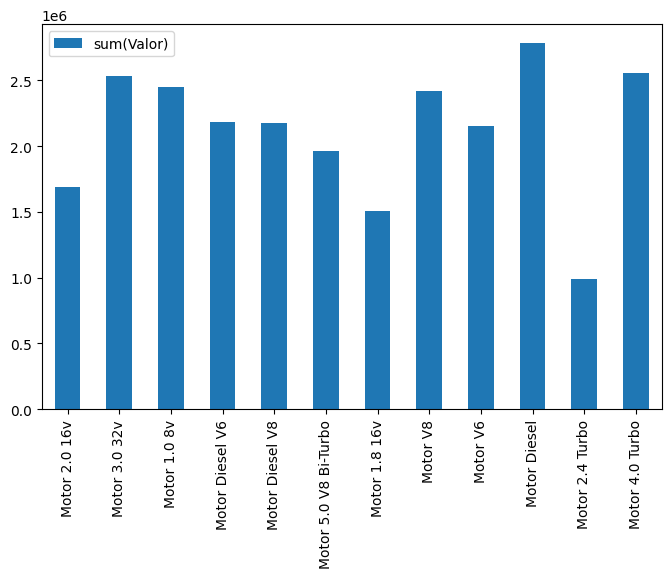

In [77]:
fig = data[["sum(Valor)"]].plot(figsize=(8,5), kind='bar')
fig.set_xticklabels(data["Motor"])


#AAAAHHHHH